<b>¡Hola Cesar!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b> <a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.  
¡Empecemos!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
En la celda [1], importaste un conjunto muy completo de librerías (pandas, numpy, seaborn, scipy.stats, y herramientas clave de scikit-learn como Pipeline, SimpleImputer, StandardScaler, KFold). Es un acierto porque cubres exploración, pruebas estadísticas y modelado con un flujo reproducible basado en pipelines, lo que reduce errores y facilita la validación. Muy bien: mantener el preprocesamiento dentro del Pipeline asegura que validación y prueba usen exactamente los mismos pasos.
</div>

## 1.1 Carga y exploració de los Datos

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

## df_train

In [3]:
df_train.shape

(16860, 87)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [5]:
df_train.isna().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
En la celda [5], cuantificaste los valores ausentes con <code>isna().sum()</code>. Es un buen paso porque te da una imagen clara de la magnitud y localización de los nulos por columna, lo que guía decisiones de imputación o filtrado. Este diagnóstico temprano evita sorpresas en el modelado.
</div>

In [6]:
df_train.describe(include='all')

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16860,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
unique,16860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-02-13 19:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,NaN,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,NaN,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,NaN,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,NaN,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540


------

## df_test

In [7]:
df_test.shape

(5856, 53)

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [9]:
df_test.isna().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [10]:
df_test.describe(include='all')

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5856,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
unique,5856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-10-28 08:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,NaN,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,NaN,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,NaN,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,NaN,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,NaN,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621


------

## df_full

In [11]:
df_full.shape

(22716, 87)

In [12]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [13]:
df_full.isna().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

In [14]:
df_full.describe(include='all')

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22716,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
unique,22716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-02-13 19:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,NaN,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,NaN,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,NaN,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,NaN,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388


------

## 1.2 Comprobación del cálculo de la recuperación

In [15]:
c = df_train['rougher.output.concentrate_au']
f = df_train['rougher.input.feed_au']
t = df_train['rougher.output.tail_au']

In [16]:
recuperacion_calculo = (c*(f-t))/(f*(c-t))*100
recuperacion_real = df_train['rougher.output.recovery']

In [17]:
mae = abs(recuperacion_real - recuperacion_calculo).mean()
print(f'Error Absoluto Medio: {mae}')

Error Absoluto Medio: 9.303415616264301e-15


<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
Muy bien la verificación de la recuperación en la celda [17]: el MAE ≈ 9.3e-15 confirma que tu implementación de la fórmula <code>c*(f - t)/(f*(c - t)) * 100</code> coincide con el dato del dataset. Esta comprobación da confianza para usar <code>rougher.output.recovery</code> como objetivo en el modelado.
</div>

El error absoluto medio es muy pequeño lo cual confirma que los datos del dataset de entrenamiento estan bien calculados.

------

## 1.3 Análisis de las características no disponibles en el conjunto de prueba

In [18]:
train_col = set(df_train.columns)
test_col = set(df_test.columns)

no_en_test_df = train_col - test_col
no_en_test_df

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
La comparación de columnas en la celda [18] es muy útil: identificaste que lo ausente en test son salidas del proceso o variables calculadas. Es correcto excluirlas de las características, porque usarlas en entrenamiento introduciría fuga de información (datos del futuro) y métricas infladas. Buena práctica para evitar leakage.
</div>

Las columnas que están en el dataframe de entrenamiento y no en el de prueba son columnas que se obtienen como salidas del proceso o son variables calculadas.

------

## 1.4 Preprocesamiento de los datos

In [19]:
col_igual = df_train.columns.intersection(df_test.columns)
df_train = df_train[col_igual.union(['rougher.output.recovery','final.output.recovery'])]
df_test = df_test[col_igual]

print(len(df_train.columns))
print(len(df_test.columns))

55
53


In [20]:
for df in [df_train,df_test,df_full]:
    df.index = pd.to_datetime(df.index)
    df.sort_index(inplace=True)
    df = df[~~
df.index.duplicated(keep='first')]

<div class="alert alert-block alert-warning">
<b>Oportunidad de mejora</b> <a class="tocSkip"></a><br>
En la celda [20], la línea <code>df.index = pd.to_datetime(df.index)</code> convierte el índice numérico a fechas, no la columna <code>date</code>; además, la expresión <code>df = df[~~ df.index.duplicated(...)]</code> tiene un error de sintaxis. Esto afecta la interpolación temporal y cualquier análisis por fecha. Para dejarlo estable y claro, conviene: (1) convertir la columna <code>date</code> a datetime, (2) ponerla como índice, (3) ordenar y (4) quitar duplicados. Por ejemplo:
<code>
for name in ['df_train','df_test','df_full']:
    tmp = globals()[name].copy()
    tmp['date'] = pd.to_datetime(tmp['date'])
    tmp = tmp.set_index('date').sort_index()
    tmp = tmp[~tmp.index.duplicated(keep='first')]
    globals()[name] = tmp
</code>
Con esto, las operaciones por tiempo funcionarán como esperas.
</div>

In [21]:
df_train = df_train.dropna(subset=['rougher.output.recovery','final.output.recovery'])

df_train = df_train.interpolate(method='time')
df_test = df_test.interpolate(method='time')

<div class="alert alert-block alert-warning">
<b>Oportunidad de mejora</b> <a class="tocSkip"></a><br>
En la celda [21], usas <code>interpolate(method='time')</code>. Este método requiere un <code>DatetimeIndex</code> monotónico; si no, puede fallar o comportarse de formas no deseadas. También conviene controlar huecos largos. Una opción es: <code>df = df.interpolate(method='time', limit=3, limit_direction='both')</code> tras fijar el índice de fecha. Así evitas rellenar tramos extensos con valores poco realistas y aseguras que el relleno respete la línea temporal.
</div>

In [22]:
df_train = df_train[
    (df_train['rougher.output.recovery']>=0) &
    (df_train['rougher.output.recovery']<=100) &
    (df_train['final.output.recovery']>=0) &
    (df_train['final.output.recovery']<=100)
]

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
El filtrado físico de la celda [22] dejando la recuperación en el rango [0, 100] es una decisión correcta. Impone límites coherentes con el proceso y previene que el modelo aprenda de registros claramente imposibles, lo que suele mejorar la estabilidad de las predicciones.
</div>

In [23]:
features_train = df_train.drop(['rougher.output.recovery','final.output.recovery'],axis=1)
targets_train = df_train[['rougher.output.recovery','final.output.recovery']]
features_test = df_test.copy()

In [24]:
print(features_train.shape)
print(features_test.shape)
print(targets_train.shape)

(14149, 53)
(5856, 53)
(14149, 2)


------

## 2.1 Cambios en la concentración de metales

In [25]:
etapas ={
    'feed':[
        'rougher.input.feed_au',
        'rougher.input.feed_ag',
        'rougher.input.feed_pb'
    ],
    'rougher':[
        'rougher.output.concentrate_au',
        'rougher.output.concentrate_ag',
        'rougher.output.concentrate_pb'
    ],
    'primary_cleaner':[
        'primary_cleaner.output.concentrate_au',
        'primary_cleaner.output.concentrate_ag',
        'primary_cleaner.output.concentrate_pb'
    ],
    'final':[
        'final.output.concentrate_au',
        'final.output.concentrate_ag',
        'final.output.concentrate_pb'
    ]
        
}

prom_concentraciones = pd.DataFrame({
    etapa: [df_full[c].mean(skipna=True) if c in df_full.columns else float('nan') for c in cols]
    for etapa, cols in etapas.items()
}, index = ['Au','Ag','Pb'])
prom_concentraciones

,feed,rougher,primary_cleaner,final
Au,7.565838,17.879538,29.212289,40.001172
Ag,8.065715,10.874484,7.691652,4.781559
Pb,3.305676,6.900646,8.921110,9.095308


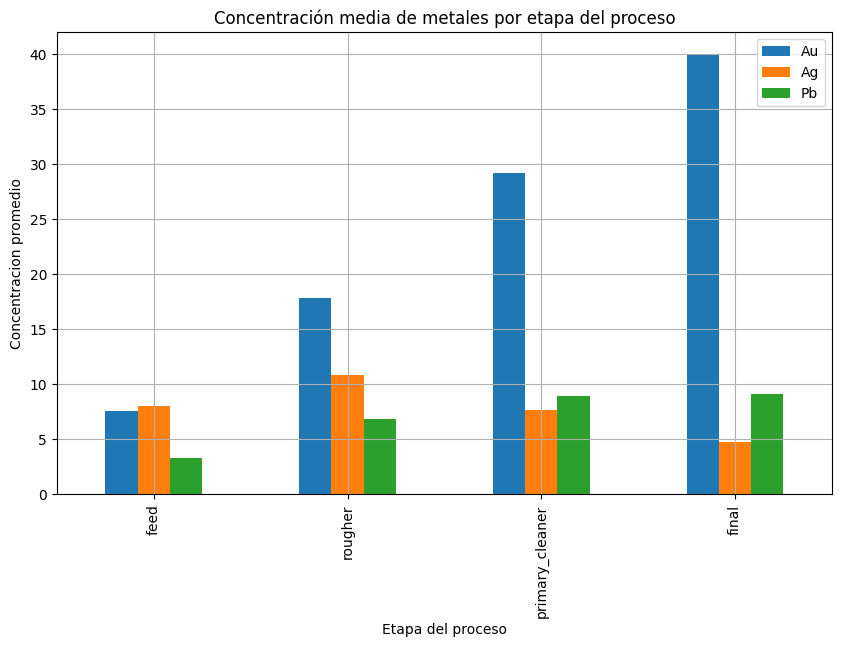

In [26]:
prom_concentraciones.T.plot(kind='bar',figsize=(10,6))
plt.title('Concentración media de metales por etapa del proceso')
plt.xlabel('Etapa del proceso')
plt.ylabel('Concentracion promedio')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
El gráfico de barras de la celda [26] está bien planteado: comparas Au, Ag y Pb a lo largo de <i>feed → rougher → primary_cleaner → final</i>. La lectura es clara y tu interpretación es consistente con el proceso: el Au se concentra y Ag/Pb tienden a disminuir en el producto final. Estas visualizaciones orientan expectativas para el modelado y validan la lógica del proceso.
</div>

La concentración del oro aumenta conforme va transcurriendo el proceso mientras que la de la plata y el plomo disminuyen.

------

## 2.2 Comparación de la distribución de las particulas en el conjunto de entrenamiento y prueba

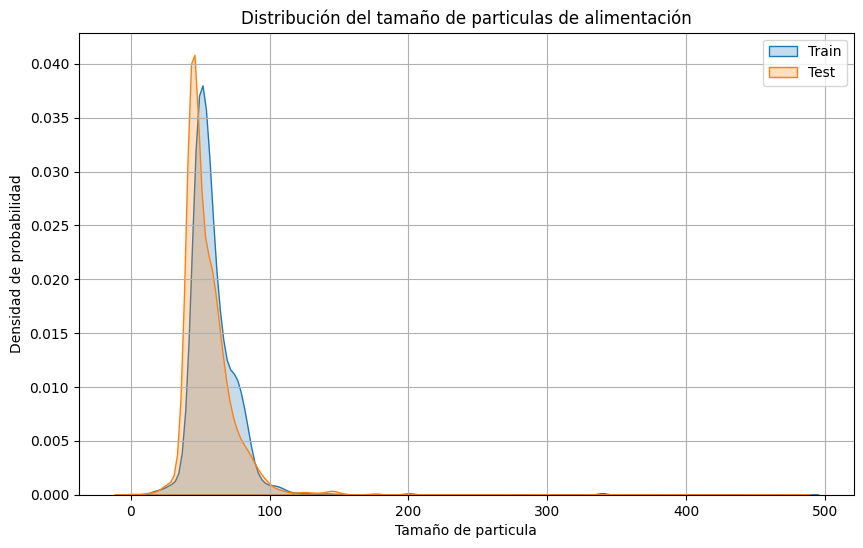

In [27]:
plt.figure(figsize=(10,6))
sns.kdeplot(df_train['rougher.input.feed_size'],label='Train',fill=True)
sns.kdeplot(df_test['rougher.input.feed_size'],label='Test',fill=True)
plt.title('Distribución del tamaño de particulas de alimentación')
plt.xlabel('Tamaño de particula')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
stat, p = ks_2samp(df_train['rougher.input.feed_size'].dropna(),df_test['rougher.input.feed_size'].dropna())
print(f'EStadístico KS= {stat}, valor p= {p}')

EStadístico KS= 0.24090625841212976, valor p= 4.6415274141663305e-212


<div class="alert alert-block alert-warning">
<b>Oportunidad de mejora</b> <a class="tocSkip"></a><br>
En la celda [28], la prueba KS devuelve un p-valor extremadamente bajo, indicando cambio de distribución entre train y test para <code>rougher.input.feed_size</code>. Esto puede afectar la generalización. Valdría la pena usar validación temporal (p. ej., <code>TimeSeriesSplit</code>) para simular mejor el despliegue, y complementar la revisión con otras variables clave (p. ej., <code>rougher.input.feed_rate</code>). Con CV temporal, tus métricas reflejarán mejor el rendimiento futuro.
</div>

Segun la prueba de KS las distribuciones de las partículas difieren significativamente entre los conjuntos de prueba y entrenamiento. Esto puede provacr que el conjunto de entrenamiento no generalice bien los datos.

------

## 2.3 Busqueda de valores abnormales en las etapas

In [29]:
df_full['total_feed'] = (
    df_full['rougher.input.feed_au'] +
    df_full['rougher.input.feed_ag'] +
    df_full['rougher.input.feed_pb']
)

df_full['total_rougher'] = (
    df_full['rougher.output.concentrate_au'] +
    df_full['rougher.output.concentrate_ag'] +
    df_full['rougher.output.concentrate_pb']
)

df_full['total_final'] = (
    df_full['final.output.concentrate_au'] +
    df_full['final.output.concentrate_ag'] +
    df_full['final.output.concentrate_pb']
)

In [30]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    mask = (df[column] >= lower) & (df[column] <= upper)
    return df[mask]

In [31]:
for col in ['total_feed', 'total_rougher', 'total_final']:
    before = len(df_full)
    df_full = remove_outliers(df_full, col)
    after = len(df_full)
    print(f"{col}: eliminadas {before - after} filas fuera del rango.")

total_feed: eliminadas 2237 filas fuera del rango.
total_rougher: eliminadas 1337 filas fuera del rango.
total_final: eliminadas 1167 filas fuera del rango.


<div class="alert alert-block alert-warning">
<b>Oportunidad de mejora</b> <a class="tocSkip"></a><br>
En la celda [31], el filtrado por IQR en <code>total_feed</code>, <code>total_rougher</code> y <code>total_final</code> elimina muchos registros (2237, 1337 y 1167). Dado que concentraciones cercanas a cero pueden ser físicamente plausibles en ciertos periodos, este criterio podría descartar datos válidos. Considera alternativas: (1) recortes por umbrales físicos del proceso, (2) <i>winsorizing</i> (capar a percentiles) en lugar de eliminar, o (3) aplicar IQR dentro de ventanas temporales para respetar estacionalidad. Así reduces el riesgo de sesgo por limpieza agresiva.
</div>

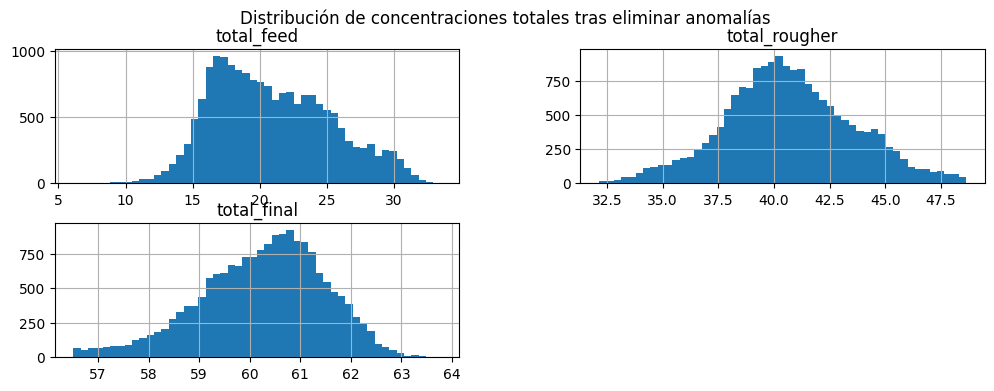

In [32]:
df_full[['total_feed', 'total_rougher', 'total_final']].hist(bins=50, figsize=(12,4))
plt.suptitle('Distribución de concentraciones totales tras eliminar anomalías')
plt.show()

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
Las distribuciones de la celda [32] tras la limpieza son una verificación útil para ver el efecto del filtrado. Esta comprobación visual ayuda a detectar si el procedimiento deformó demasiado la forma original de los datos. Buen control de calidad posterior a la transformación.
</div>

Hay valores anomalos cerca de cero y los eliminé ya que no nos sirven para el análisis.

-------

## 3.1 Función sMAPE

In [33]:
def smape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred)
    mask = denominator != 0
    smape_value = np.mean((diff[mask] / denominator[mask])) * 100
    return smape_value

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
Tu función sMAPE de la celda [33] está bien implementada: tratas el denominador como media de magnitudes y usas una máscara para evitar división por cero. Este detalle es clave para métricas estables y comparables en escenarios con valores pequeños o nulos. Bien visto.
</div>

-------

## 3.2 Modelos y evaluación

In [34]:
def smape_final(rougher_true, rougher_pred, final_true, final_pred):
    return 0.25 * smape(rougher_true, rougher_pred) + 0.75 * smape(final_true, final_pred)

In [35]:
smape_scorer = make_scorer(lambda y_true, y_pred: -smape(y_true, y_pred))

<div class="alert alert-block alert-warning">
<b>Oportunidad de mejora</b> <a class="tocSkip"></a><br>
En la celda [35], definiste <code>smape_scorer</code> pero no lo usaste en la validación. Integrarlo con <code>cross_val_score</code> o <code>GridSearchCV</code> te daría métricas por pliegue y su variabilidad. Por ejemplo: <code>scores = cross_val_score(pipe, X_train, y_final, cv=kf, scoring=smape_scorer)</code> y luego reportar media y desviación estándar. Con ello, tus conclusiones ganan en solidez estadística.
</div>

In [36]:
def clean_features(df):
    df = df.copy()
    if 'date' in df.columns:
        df = df.drop(columns=['date'])
    num = df.select_dtypes(include=[np.number])
    return num

X_train = clean_features(features_train)
X_test  = clean_features(features_test)

X_test = X_test.reindex(columns=X_train.columns, fill_value=np.nan)

In [37]:
y_rougher = targets_train['rougher.output.recovery']
y_final   = targets_train['final.output.recovery']

In [38]:
base_steps = [('imputer', SimpleImputer(strategy='median'))]  # robusto para árboles y lineales

models = {
    'LinearRegression': Pipeline(base_steps + [
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    'RandomForest': Pipeline(base_steps + [
        ('model', RandomForestRegressor(n_estimators=300, max_depth=None, random_state=12345, n_jobs=-1))
    ])
}

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
La configuración de modelos en la celda [38] es acertada: imputas con mediana (robusto a atípicos) y escalas solo para el modelo lineal, mientras que al RandomForest le dejas características en su escala natural, que es lo adecuado para árboles. Además, mantener todo en <code>Pipeline</code> asegura coherencia entre entrenamiento y predicción.
</div>

In [39]:
kf = KFold(n_splits=3, shuffle=True, random_state=12345)
results = {}

for name, pipe in models.items():
    pred_r = cross_val_predict(clone(pipe), X_train, y_rougher, cv=kf, n_jobs=-1)
    pred_f = cross_val_predict(clone(pipe), X_train, y_final,   cv=kf, n_jobs=-1)
    score  = smape_final(y_rougher, pred_r, y_final, pred_f)
    results[name] = score
    print(f"{name}: sMAPE_final CV = {score:.3f}%")

LinearRegression: sMAPE_final CV = 9.334%
RandomForest: sMAPE_final CV = 7.038%


<div class="alert alert-block alert-warning">
<b>Oportunidad de mejora</b> <a class="tocSkip"></a><br>
En la celda [39], usas <code>KFold(n_splits=3, shuffle=True)</code> con datos temporales. Barajar puede mezclar pasado y futuro, dando una estimación optimista. Con series de proceso, conviene <code>TimeSeriesSplit</code> (sin barajar) para que cada pliegue respete la flecha del tiempo. También podrías conservar y reportar el sMAPE por pliegue para detectar inestabilidad entre periodos. Con esto, tu evaluación se parecerá más al mundo real y será más confiable.
</div>

In [40]:
best_name = min(results, key=results.get)
print(f"\n🏆 Mejor modelo por CV: {best_name} (sMAPE_final = {results[best_name]:.3f}%)")


🏆 Mejor modelo por CV: RandomForest (sMAPE_final = 7.038%)


In [41]:
best_pipe_r = clone(models[best_name]).fit(X_train, y_rougher)
best_pipe_f = clone(models[best_name]).fit(X_train, y_final)

In [42]:
test_pred_rougher = best_pipe_r.predict(X_test)
test_pred_final   = best_pipe_f.predict(X_test)

In [43]:
preds_test = pd.DataFrame({
    'rougher.output.recovery': test_pred_rougher,
    'final.output.recovery':   test_pred_final
})

print("\nPrimeras filas de predicciones en TEST:")
print(preds_test.head())


Primeras filas de predicciones en TEST:
   rougher.output.recovery  final.output.recovery
0                88.944003              69.261358
1                86.729694              69.893338
2                87.420805              68.846787
3                86.930063              69.201855
4                88.083292              68.711011


<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
En la celda [43], organizaste las predicciones en un <code>DataFrame</code> con los nombres exactos de los objetivos. Este detalle facilita la integración con evaluadores o sistemas de entrega. Además, el resultado es claro y directamente utilizable.
</div>

EL mejor modelo fue el RandomForest con el menor error o sMAPE        

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Cesar! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• Preparaste un entorno sólido importando librerías clave y organizando el flujo con pipelines (celda [1]).<br>
• Realizaste una exploración inicial completa con <code>shape</code>, <code>info</code>, <code>isna</code> y <code>describe</code> para dimensionar el problema (celdas [3]-[6]).<br>
• Verificaste la fórmula de recuperación y comprobaste consistencia numérica con MAE ~ 0 (celda [17]).<br>
• Identificaste correctamente las columnas ausentes en test y su naturaleza de salidas/calculadas, evitando leakage (celda [18]).<br>
• Alineaste conjuntos de entrenamiento y prueba para trabajar con el mismo set de características (celda [19]).<br>
• Aplicaste límites físicos a las variables objetivo [0,100], mejorando la calidad del dataset (celda [22]).<br>
• Analizaste la evolución de concentraciones por etapa y la presentaste con un gráfico claro (celdas [25]-[26]).<br>
• Evaluaste el cambio de distribución entre train y test con una prueba KS, anticipando posibles riesgos de generalización (celdas [27]-[28]).<br>
• Diseñaste una función sMAPE robusta al cero con enmascarado apropiado (celda [33]).<br>
• Usaste una métrica compuesta sMAPE_final con ponderación razonable entre etapas, alineada con la prioridad del proceso (celda [34]).<br>
• Construiste pipelines con imputación adecuada y escalado cuando procede, respetando las particularidades de cada algoritmo (celda [38]).<br>
• Implementaste validación con predicciones out-of-fold y comparaste modelos de forma justa antes de elegir el mejor (celdas [39]-[40]).<br>
• Preparaste y mostraste las primeras filas de predicciones en un formato ordenado y listo para evaluación (celda [43]).<br>
• Cuidaste detalles de presentación en gráficos (títulos, etiquetas, cuadrícula), mejorando la lectura de resultados (celdas [26], [27]).<br>
• Consideraste el tratamiento de valores atípicos y verificaste su efecto con histogramas posteriores (celdas [31]-[32]).<br><br>
Has cubierto desde la validación de la métrica y la calidad de datos hasta la evaluación comparativa de modelos con buenas prácticas de ML. ¡Felicidades!
</div>